In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, time

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
df_oct = pd.read_csv("data/vumonic_india_food_delivery_20231001_20231031.csv", low_memory=False)
df_nov = pd.read_csv("data/vumonic_india_food_delivery_20231101_20231130.csv", low_memory=False)

# with open('data/vumonic_india_food_delivery_20231201_20231231.csv', 'r') as f:
#     first_line = f.readline()
# columns = first_line.replace('\n', '').split(',')
columns = df_nov.columns

df_dec = pd.read_csv('data/vumonic_india_food_delivery_20231201_20231231.csv', usecols=columns, encoding='latin-1', low_memory=False)

df = pd.concat([df_dec, df_nov, df_oct], ignore_index=True)
drop_columns = ['mid', 'year', 'order_promotion_discount', 
                'order_coupon_discount', 'order_seller_discount', 'order_delivery_discount',
                'order_status', 'order_delivery_discount', 'delivery_address_postal_code', 'order_payment_currency',
                'restaurant_address_postal_code', 'user_dob', 'user_address_postal_code', 'user_address_country']
df =  df.drop(drop_columns, axis=1)
df = df[df['user_age'] != 'male']

In [3]:
df

,transaction_id,company,sender_id,email_timestamp,month,day,product_name,product_price,product_quantity,product_total,order_subtotal,order_convenience_fee,order_packaging_fee,order_delivery_fee,order_tip,order_taxes,order_membership_fee,order_discount,order_membership_discount,order_amount_paid,order_discount_code,premium_membership,premium_membership_type,free_delivery,order_payment_type,delivery_address_city,delivery_address_state,restaurant_name,restaurant_address_city,restaurant_address_state,user_id,user_gender,user_age,user_address_city,user_address_state,user_device_brand,user_device_model,user_os_type,user_onboard_at,user_inactive_at
0,bfa86dc42518cc98cb1f6a5dc3ac6a5d,swiggy,noreply@swiggy.in,2023-12-01T00:08:24+00:00,12,1,Classic Chicken Roll,216.0,1.0,216.0,216.0,3.0,7.0,NaN,NaN,7.69,NaN,100.00,NaN,134.0,SWIGGYIT,True,swiggy_one,NaN,paytm,bangalore,karnataka,Rollsking,bangalore,karnataka,edb4a1a7320232810d47fdf695fdbeb1,male,23.0,Bengaluru,Karnataka,samsung,SM-G781B,android,2023-07-10T11:03:52.000Z,NaN
1,bfa86dc42518cc98cb1f6a5dc3ac6a5d,swiggy,noreply@swiggy.in,2023-12-01T00:08:24+00:00,12,1,Multigrain Laccha Paratha Roll,NaN,NaN,NaN,216.0,3.0,7.0,NaN,NaN,7.69,NaN,100.00,NaN,134.0,SWIGGYIT,True,swiggy_one,Free,paytm,bangalore,karnataka,Rollsking,bangalore,karnataka,edb4a1a7320232810d47fdf695fdbeb1,male,23.0,Bengaluru,Karnataka,samsung,SM-G781B,android,2023-07-10T11:03:52.000Z,NaN
2,614f8a99775ff921f7360f4140a7ba11,swiggy,noreply@swiggy.in,2023-12-01T00:10:41+00:00,12,1,Double Cheese Slice,NaN,NaN,NaN,256.0,3.0,10.0,NaN,NaN,8.84,NaN,99.99,NaN,178.0,FLATDEAL,True,swiggy_one,Free,bank,hyderabad,telangana,Shrimmers,hyderabad,telangana,a13bf807ac3741ae6d118472115fef00,male,28.0,Hyderabad,Telangana,realme,RMX3395,android,2023-05-02T22:38:13.000Z,NaN
3,614f8a99775ff921f7360f4140a7ba11,swiggy,noreply@swiggy.in,2023-12-01T00:10:41+00:00,12,1,Crispy Potato Burger,89.0,1.0,89.0,256.0,3.0,10.0,NaN,NaN,8.84,NaN,99.99,NaN,178.0,FLATDEAL,True,swiggy_one,NaN,bank,hyderabad,telangana,Shrimmers,hyderabad,telangana,a13bf807ac3741ae6d118472115fef00,male,28.0,Hyderabad,Telangana,realme,RMX3395,android,2023-05-02T22:38:13.000Z,NaN
4,614f8a99775ff921f7360f4140a7ba11,swiggy,noreply@swiggy.in,2023-12-01T00:10:41+00:00,12,1,Cheese Slice,NaN,NaN,NaN,256.0,3.0,10.0,NaN,NaN,8.84,NaN,99.99,NaN,178.0,FLATDEAL,True,swiggy_one,Free,bank,hyderabad,telangana,Shrimmers,hyderabad,telangana,a13bf807ac3741ae6d118472115fef00,male,28.0,Hyderabad,Telangana,realme,RMX3395,android,2023-05-02T22:38:13.000Z,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741079,9838db546bd880398bae5e8de6a68c3b,swiggy,noreply@swiggy.in,2023-10-26T19:23:37+00:00,10,26,Egg Curry 3 Eggs,200.0,1.0,200.0,330.0,3.0,20.0,9.0,NaN,13.35,NaN,124.99,NaN,250.0,SUPERSAVER,NaN,NaN,NaN,NaN,eluru,andhra pradesh,Devi Homely Kitchen,NaN,andhra pradesh,50b87b56ac5691d53f45015e6484fbbf,male,28.0,Hyderabad,Telangana,samsung,SM-M405F,android,2020-03-22T03:29:32.000Z,NaN
741080,abfb444e117e7958b0b618ddcae44e39,swiggy,noreply@swiggy.in,2023-10-29T10:37:05+00:00,10,29,Chicken Fry Piece Biryani Half,250.0,1.0,250.0,250.0,3.0,NaN,9.0,NaN,8.35,NaN,125.00,NaN,145.0,SWIGGYWEEKENDS,NaN,NaN,NaN,NaN,eluru,andhra pradesh,Devi Homely Kitchen,NaN,andhra pradesh,50b87b56ac5691d53f45015e6484fbbf,male,28.0,Hyderabad,Telangana,samsung,SM-M405F,android,2020-03-22T03:29:32.000Z,NaN
741081,084f0df866d7928acf1c8f332184dec9,swiggy,noreply@swiggy.in,2023-10-30T09:30:29+00:00,10,30,Chicken Fry Biryani,320.0,1.0,320.0,320.0,3.0,12.0,9.0,NaN,14.64,NaN,50.00,NaN,309.0,SWIGGYIT,NaN,NaN,NaN,NaN,eluru,andhra pradesh,Royal Family Restaurant,NaN,andhra pradesh,50b87b56ac5691d53f45015e6484fbbf,male,28.0,Hyderabad,Telangana,samsung,SM-M405F,android,2020-03-22T03:29:32.000Z,NaN
741082,ad320c16a2e04078f50af1416107bda2,swiggy,noreply@swiggy.in,2023-10-05T06:57:56+00:00,10,5,Veg Delight Pizza,109.0,3.0,327.0,327.0,NaN,NaN

In [150]:
df.groupby(['company', 'transaction_id'], dropna=False).mean().groupby('company', dropna=False).sum()[['order_amount_paid']]

,order_amount_paid
company,
swiggy,64056790.00
zomato,70410621.16


In [151]:
70410621.16 + 64056790.00

134467411.16

In [155]:
(70410621.16 - 64056790.00)/ 64056790.00

0.09919059571982917

In [153]:
64056790.00 / 134467411.16

0.47637408534459064

In [114]:
oct_ids = df[(df.month == 10) & (df.company == "swiggy")].user_id.unique()
nov_ids = df[(df.month == 11) & (df.company == "swiggy")].user_id.unique()
dec_ids = df[(df.month == 12) & (df.company == "swiggy")].user_id.unique()
print(len(oct_ids), len(nov_ids), len(dec_ids))

18051 17158 16246


In [115]:
len([i for i in nov_ids if i in oct_ids])

9975

In [116]:
len([i for i in dec_ids if i in oct_ids])

8793

In [117]:
len([i for i in dec_ids if i in nov_ids])

9596

In [118]:
len([i for i in dec_ids if i in nov_ids and i in oct_ids])

7096

In [119]:
len([i for i in dec_ids if i in nov_ids or i in oct_ids])

11293

In [120]:
len([i for i in nov_ids if i in oct_ids]) / len(nov_ids)

0.5813614640400979

In [121]:
len([i for i in dec_ids if i in oct_ids]) / len(dec_ids)

0.5412409208420534

In [122]:
len([i for i in dec_ids if i in nov_ids]) / len(dec_ids)

0.5906684722393204

In [123]:
len([i for i in dec_ids if i in nov_ids and i in oct_ids]) / len(dec_ids)

0.4367844392465838

In [124]:
len([i for i in dec_ids if i in nov_ids or i in oct_ids]) / len(dec_ids)

0.6951249538347901

In [140]:
oct_ids = df[(df.month == 10) & (df.company == "zomato")].user_id.unique()
nov_ids = df[(df.month == 11) & (df.company == "zomato")].user_id.unique()
dec_ids = df[(df.month == 12) & (df.company == "zomato")].user_id.unique()
print(len(oct_ids), len(nov_ids), len(dec_ids))

15893 15585 15190


In [126]:
len([i for i in nov_ids if i in oct_ids])

10077

In [127]:
len([i for i in dec_ids if i in oct_ids])

9276

In [128]:
len([i for i in dec_ids if i in nov_ids])

9947

In [129]:
len([i for i in dec_ids if i in nov_ids and i in oct_ids])

7602

In [130]:
len([i for i in dec_ids if i in nov_ids or i in oct_ids])

11621

In [131]:
len([i for i in nov_ids if i in oct_ids]) / len(nov_ids)

0.6465832531280077

In [132]:
len([i for i in dec_ids if i in oct_ids]) / len(dec_ids)

0.6106649111257406

In [133]:
len([i for i in dec_ids if i in nov_ids]) / len(dec_ids)

0.6548387096774193

In [134]:
len([i for i in dec_ids if i in nov_ids and i in oct_ids]) / len(dec_ids)

0.5004608294930876

In [135]:
len([i for i in dec_ids if i in nov_ids or i in oct_ids]) / len(dec_ids)

0.7650427913100725

In [84]:
df["state"] = df[['delivery_address_state', 'restaurant_address_state', 'user_address_state']].apply(
    lambda row: next((x.lower().replace('&', 'and').replace(' islands', '') for x in row if not pd.isnull(x)), np.nan), axis=1)

In [141]:
gg = df[['month', 'company', 'state', 'user_id', 'transaction_id', 'order_subtotal']]
gg = gg.groupby(['month', 'company', 'state', 'user_id', 'transaction_id'], dropna=False).count().reset_index()
# gg = gg.groupby(['month', 'company', 'state'], dropna=False).count().reset_index()[['month', 'company', 'state', 'user_id']]
gg

,month,company,state,user_id,transaction_id,order_subtotal
0,10,swiggy,andaman and nicobar,0639b3fc2102209bd35f8c3b1dcd12c6,0c1b9f3609be3c5765f1e03cb8c31ac3,3
1,10,swiggy,andaman and nicobar,0639b3fc2102209bd35f8c3b1dcd12c6,21c43124a52f184b7f96984e8a999da1,1
2,10,swiggy,andaman and nicobar,097cfd1653b08d2ebda2fc10adad0b62,1655a435b0849f068356e00bae925308,3
3,10,swiggy,andaman and nicobar,097cfd1653b08d2ebda2fc10adad0b62,1fee8b430cd3ceca7416ce1fa355adba,2
4,10,swiggy,andaman and nicobar,097cfd1653b08d2ebda2fc10adad0b62,215cd270ff973aa304049e9553b42680,3
...,...,...,...,...,...,...
394115,12,zomato,NaN,fdc96f0a820f28344595aae9a1a1805e,82af9688d4cd205f828fb24244720de1,0
394116,12,zomato,NaN,fdc96f0a820f28344595aae9a1a1805e,d73f9e6da4bcea602c85a78bad5c3847,0
394117,12,zomato,NaN,fe52548c5dac3431f044fdaaee1c2bdc,661c55c1e871d8c852d40ffb85034e2c,0
394118,12,zomato,NaN,ff68edd9d1b54af13343f9b4de4676c9,3a11f76c5acc149f88cc43270c65bd40,0


In [86]:
gg.state.unique()

array(['andaman and nicobar', 'andhra pradesh', 'assam', 'bihar',
       'chandigarh', 'chattisgarh', 'chhattisgarh', 'daman and diu',
       'delhi', 'goa', 'gujarat', 'haryana', 'himachal pradesh',
       'jammu and kashmir', 'jharkhand', 'karnataka', 'kerala',
       'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'national capital territory of delhi', 'odisha',
       'pondicherry', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu',
       'telangana', 'tripura', 'union territory of puducherry',
       'uttar pradesh', 'uttarakhand', 'west bengal', nan,
       'arunachal pradesh', 'dadra and nagar haveli',
       'dadra and nagar haveli and daman and diu'], dtype=object)

In [146]:
gg.groupby(['month', 'company'])['user_id'].nunique().reset_index(name='unique_users')

,month,company,unique_users
0,10,swiggy,18051
1,10,zomato,15893
2,11,swiggy,17158
3,11,zomato,15585
4,12,swiggy,16246
5,12,zomato,15190


In [161]:
gga = gg.groupby(['month', 'company'])['user_id'].nunique().reset_index(name='unique_users').sort_values(['company', 'month'])
gga["percentage_diff"] = 0.0
gga.month = gga.month.astype('str')

for i in range(1, len(gga)):
    if gga.iloc[i]['company'] == gga.iloc[i - 1]['company']:
        diff = gga.iloc[i]['unique_users'] / gga.iloc[i - 1]['unique_users'] - 1
        gga.at[gga.index[i], 'percentage_diff'] = diff * 100

gga

,month,company,unique_users,percentage_diff
0,10,swiggy,18051,0.000000
2,11,swiggy,17158,-4.947094
4,12,swiggy,16246,-5.315305
1,10,zomato,15893,0.000000
3,11,zomato,15585,-1.937960
5,12,zomato,15190,-2.534488


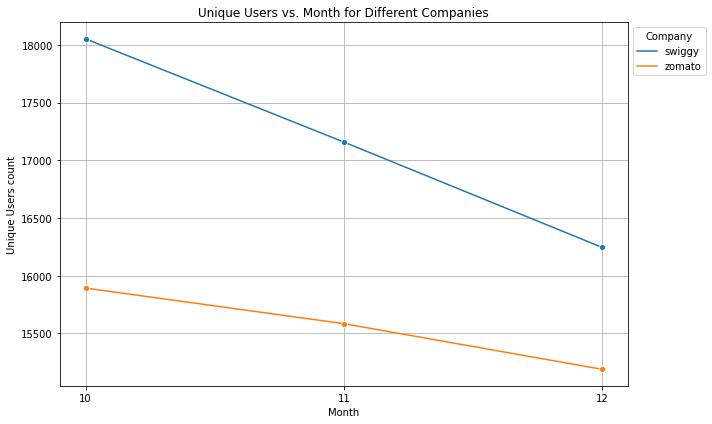

In [162]:
# Assuming 'month', 'company', and 'user_id' are columns in your DataFrame 'gga'
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='unique_users', hue='company', data=gga, marker='o')
plt.title('Unique Users vs. Month for Different Companies')
plt.xlabel('Month')
plt.ylabel('Unique Users count')
plt.grid(True)
plt.legend(title='Company', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [166]:
(16246-18051)/18051

-0.09999446014071242

In [165]:
(15190 -15893) / 15893

-0.044233310262379665

In [163]:
gga.groupby('company').sum()

,unique_users,percentage_diff
company,,
swiggy,51455,-10.262399
zomato,46668,-4.472448


In [164]:
(51455 - 46668) / 46668

0.10257564069598012

In [80]:
df["city"] = df[['delivery_address_city', 'restaurant_address_city', 'user_address_city']].apply(
    lambda row: next((x.lower().replace('&', 'and') for x in row if not pd.isnull(x)), np.nan), axis=1)

In [81]:
gg = df[['month', 'company', 'city', 'user_id', 'transaction_id', 'order_subtotal']]
gg = gg.groupby(['month', 'company', 'city', 'user_id', 'transaction_id'], dropna=False).count().reset_index()
gg = gg.groupby(['month', 'company', 'city'], dropna=False).count().reset_index()[['month', 'company', 'city', 'user_id']]
gg

,month,company,city,user_id
0,10,swiggy,abdal,2
1,10,swiggy,abohar,13
2,10,swiggy,adilabad,8
3,10,swiggy,adivarampet,1
4,10,swiggy,adoni,4
...,...,...,...,...
4768,12,zomato,yemmiganur,1
4769,12,zomato,yeotamal,1
4770,12,zomato,yerragondapalem,3
4771,12,zomato,zirakpur,129


In [83]:
gg.city.unique()

array(['abdal', 'abohar', 'adilabad', ..., 'uran islampur', 'yeotamal',
       'yerragondapalem'], dtype=object)

In [64]:
len(gg[gg.month == 10].user_id.unique())

30852

In [20]:
df[df.month==10].groupby('transaction_id').mean()['order_amount_paid'].sum()

46064190.37

In [22]:
df[df.month==11].groupby('transaction_id').mean()['order_amount_paid'].sum()

44345136.71

In [21]:
df[df.month==12].groupby('transaction_id').mean()['order_amount_paid'].sum()

44084688.01999999